In [61]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# reading the dataset

df = pd.read_csv('/content/Train.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [63]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
# replacing null values

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna('High', inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
# kdeplot

cat_cols = df.select_dtypes(include='object').columns.tolist()
for cat_col in cat_cols:
    print(f'{cat_col}: {df[cat_col].nunique()}')

Item_Identifier: 1559
Item_Fat_Content: 5
Item_Type: 16
Outlet_Identifier: 10
Outlet_Size: 3
Outlet_Location_Type: 3
Outlet_Type: 4


In [67]:
# removing unncessary columns

df.drop(columns=['Item_Identifier'], inplace=True)

<Axes: xlabel='Item_Visibility', ylabel='Count'>

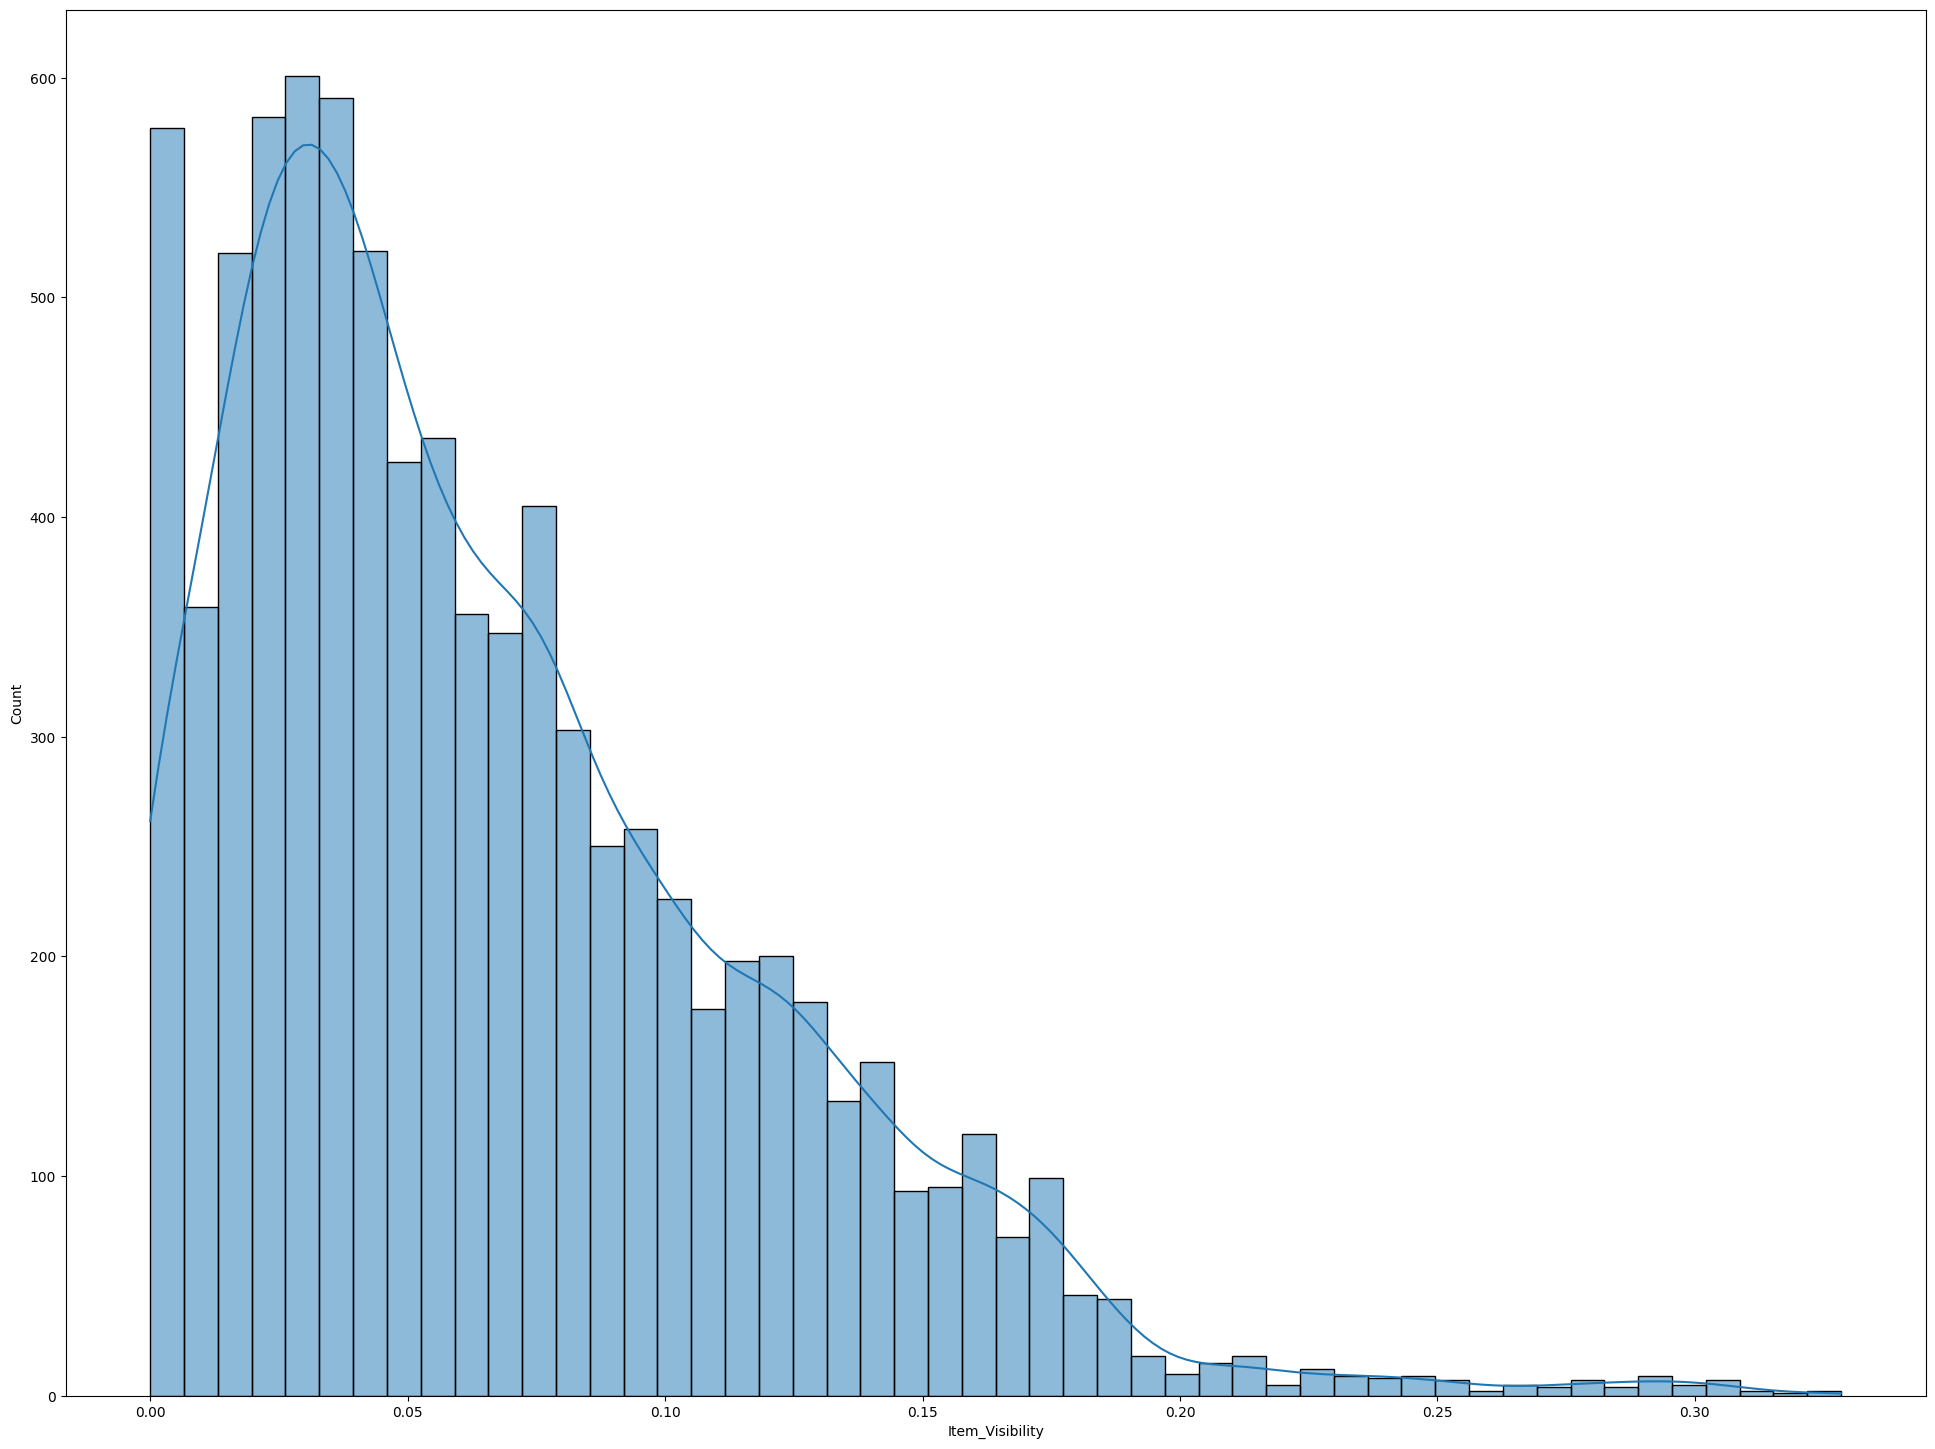

In [68]:
plt.figure(figsize=(24,18))
sns.histplot(df['Item_Visibility'], kde=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [70]:
df.columns.tolist()

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [71]:
# splitting the data

from sklearn.model_selection import train_test_split

features, labels = df.drop(columns=['Item_Outlet_Sales']), df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

In [73]:
# label conversion

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
cat_cols.remove('Item_Identifier')
for cat_col in cat_cols:
    X_train[cat_col] = label.fit_transform(X_train[cat_col])
    X_test[cat_col] = label.transform(X_test[cat_col])

In [74]:
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

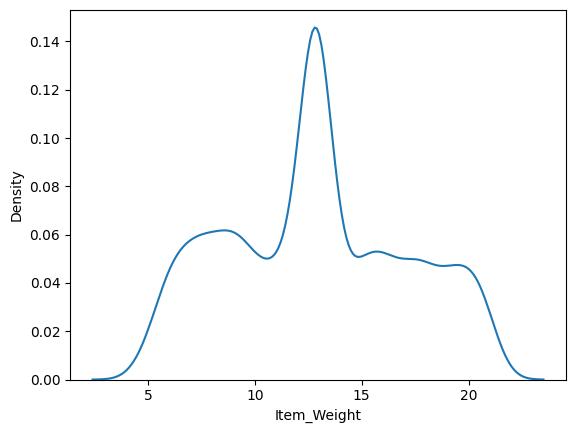

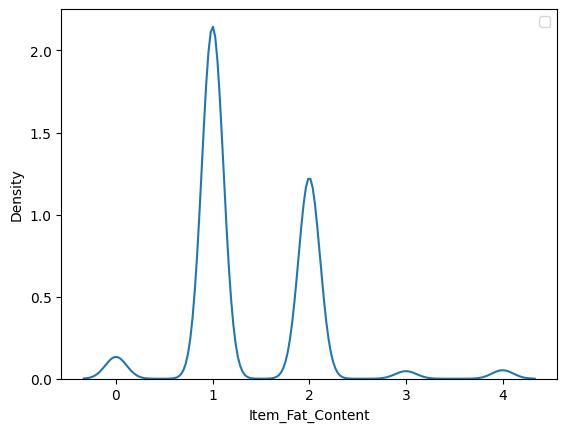

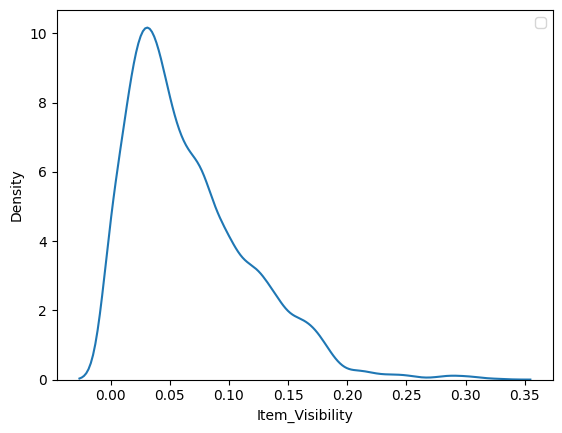

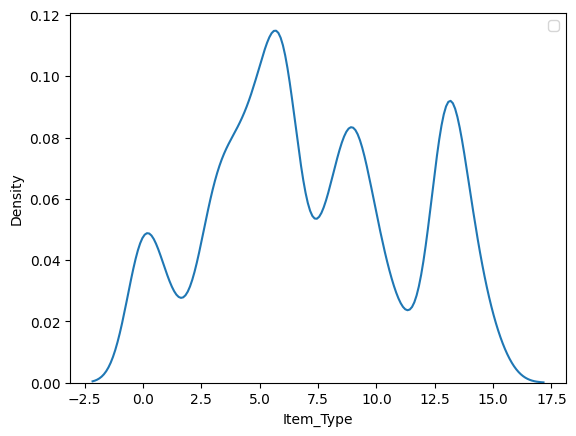

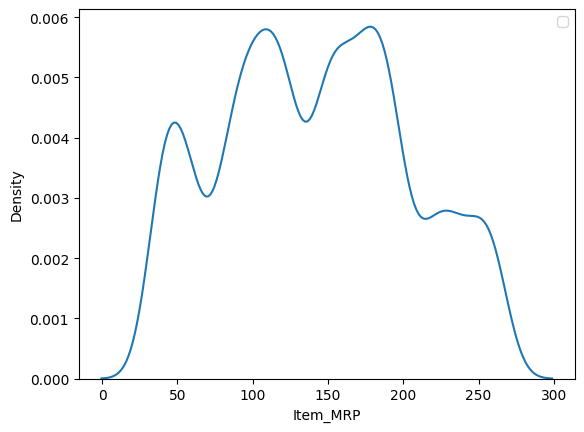

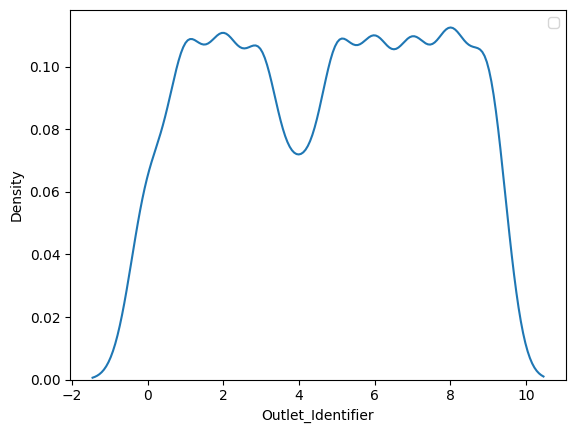

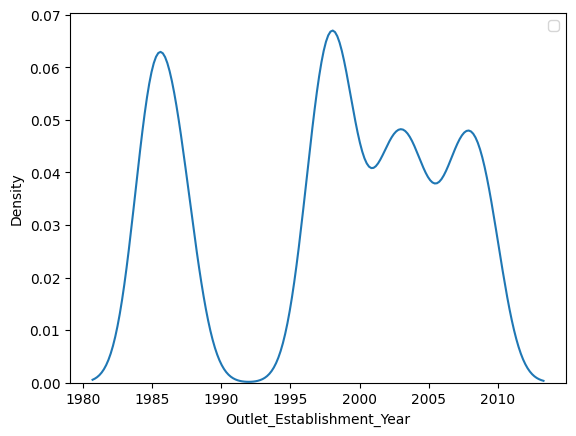

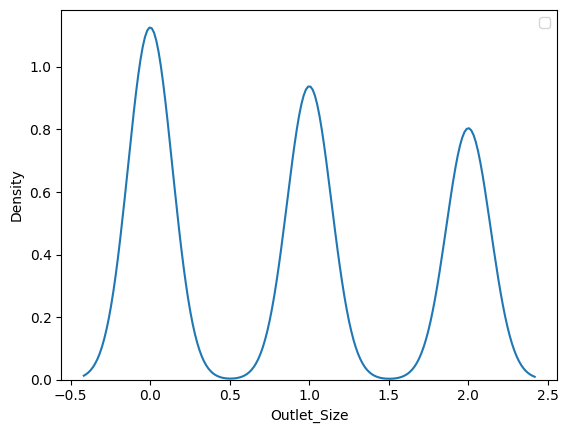

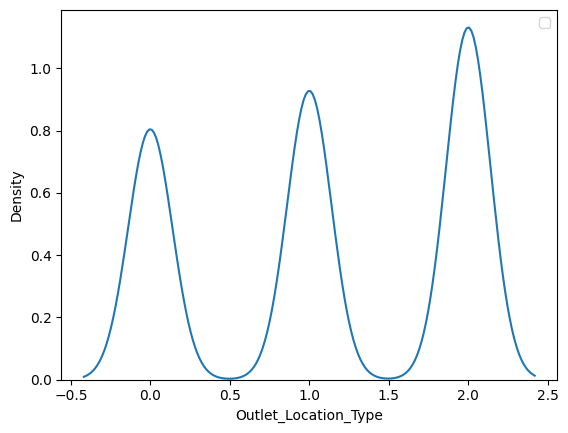

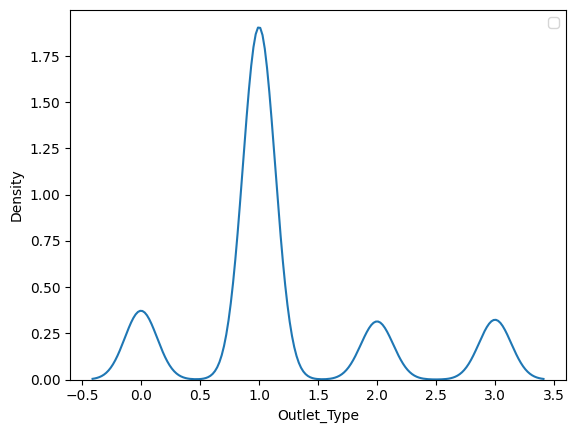

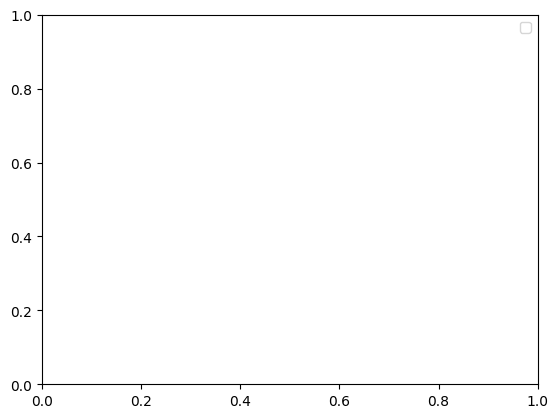

In [75]:
num_cols = X_train.select_dtypes(exclude='object')

for num_col in num_cols:
    sns.kdeplot(X_train[num_col])
    plt.show()
    plt.legend()

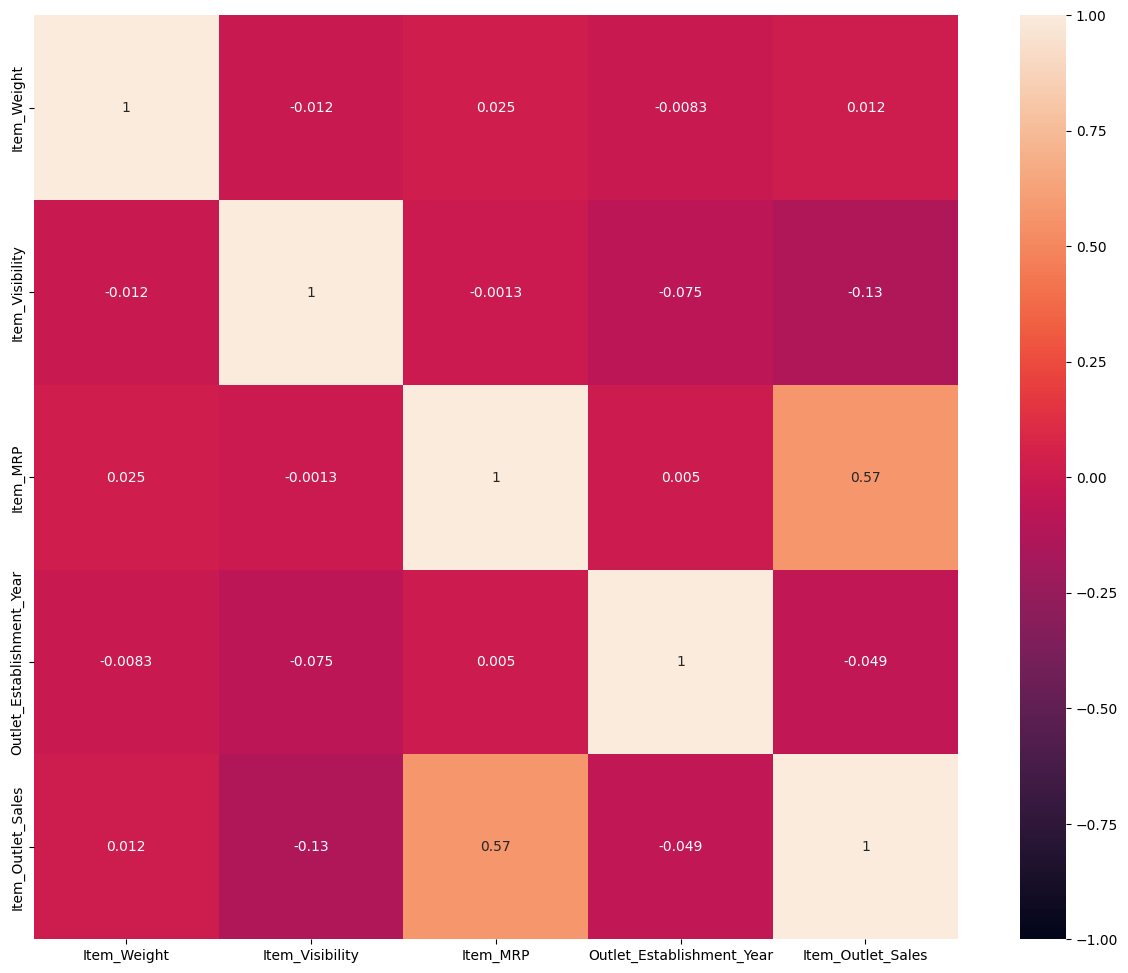

In [76]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, square=True)
plt.show()

In [77]:
# dropping item_fat_content, outliet_size

X_train.drop(columns=['Item_Fat_Content','Outlet_Size', 'Item_Weight', 'Item_Type'],inplace=True)
X_test.drop(columns=['Item_Fat_Content','Outlet_Size', 'Item_Weight', 'Item_Type'],inplace=True)

In [90]:
# importing sklearn modules

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.7)


In [91]:
from sklearn.metrics import r2_score, mean_squared_error as mse

linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

elasticnet.fit(X_train, y_train)
y_pred_elasticnet = elasticnet.predict(X_test)

In [92]:
linear_mse = mse(y_test, y_pred_linear)
linear_score = r2_score(y_test, y_pred_linear)
print(f"linear: {linear_mse} {linear_score}\n")

lasso_mse = mse(y_test, y_pred_lasso)
lasso_score = r2_score(y_test, y_pred_lasso)
print(f"lasso: {lasso_mse} {lasso_score}\n")


ridge_mse = mse(y_test, y_pred_ridge)
ridge_score = r2_score(y_test, y_pred_ridge)
print(f"ridge: {ridge_mse} {ridge_score}\n")


elasticnet_mse = mse(y_test, y_pred_elasticnet)
elasticnet_score = r2_score(y_test, y_pred_elasticnet)
print(f"elasticnet: {elasticnet_mse} {elasticnet_score}")

linear: 1369294.8620054035 0.49402267508513253

lasso: 1370197.9475624722 0.49368896988619115

ridge: 1369493.7779033398 0.4939491723380519

elasticnet: 1369712.2025599321 0.49386846077876356
